# Deep Learning
 - layer를 깊게 하는 이유: 추상화된 특징 추출
 - layer를 깊게 할 때의 문제점
   - 학습 시간이 길어지는 문제
     - transfer learning 전이학습으로 해결
  - vanishing gradient 기울기 소실 문제
     - deeper, wider, resolution을 고려해서 네트워크 설계
     - deeper: VGGnet, ResNet(Redisual block을 이용해 덧셈연산(Skip Connection)하여 가중치 더하여 진행), DenseNet(이전의 가중치 학습 결과 누적), NasNet(자동으로 파라미터 결정)
    - wider: Googlenet, InceptionV4, Xception, Mobilenet, MixNet
    - EfficientNet(B0~B7까지 네트워크 만듦.): wider, deeper, resolution 다 고려 -> compound component
    - EfficientNet(B0(경량화된 모델모바일)~B3까지 있고, S, M, L, XL 모델이 있음.)

# 망을 개선하기 위해서

In [10]:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation
# from tensorflow.keras.initializers import HeNormal

# #input_tensor = Input(shape=(224, 224, 3))

# x = Conv2D(64, (3, 3), padding='same')(input_tensor)  # 28x28x64

# # 커널 초기화 (He(relu), Xavier(sigmoid, tanh))
# x = Dense()
# x = BatchNormalization()(x)
# x = Activation('relu')(x)  # Relu도 개선
# x = Dropout(0.5)(x)  # 랜덤하게 행렬 내적 연산의 %를 줄여주는 것.
# # 30장 배치 사이즈 -> 하나의 값에 대해서 30개가 동시에 처리되고 각각의 결과(예측값)를 얻음.

# # SGD -> Adagrad (adaptive 적응적 -> 기울기 0)
# # Adadelta(기울기 문제 해결) -> RMSprop (Adagrad 문제를 해결하기 위해서)
# # 마지막에만 적응적 -> Adam (RMSprop + Momentum (가던 방향을 고려해서))
# # 다음엔 Nadam (RMSprop + Nestrov(계산이 간단))가 등장. -> AdamW(decay-weighted(규제)분리 - 모델 일반화의 강점)
# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer=Adam(learning_rate = 0.001),
#               loss = 'categorical_crossentropy',
#               metrics = ['accuracy'])

# from tensorflow.keras.callbacks import LearningRateScheduler
# def lr_scheduler(epoch, lr):
#   if epoch < 10:
#     return lr * 0.1
#   return lr

# scheduler = LearningRateScheduler(lr_scheduler)
# model.fit(x_train, y_train, epochs = 20, callbacks=[scheduler])

In [9]:
## 나영님 공유 코드
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation
from tensorflow.keras.initializers import HeNoraml, GlorotUniform

x = Conv2D(64, (3, 3), padding='same')(input_tensor) # 28x28x64

# 커널 초기화 (He(relu), Xavier(sigmoid, tanh))
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
x = BatchNormalization()(x)
x = Activation('relu')(x) # 랜덤하게 행렬 내적 연산의 %를 줄여주는 것
# 30장 배치 사이즈 -> 하나의 값에 대해서 30개가 있다
# SGD(stochastic gradient descent) -> Adagrad(adaptive적응적->기울기가 0이되는 문제 생김)
# Adadelta(기울기 문제 해결) =>RMSprop(Adagrad문제를 해결하기 위해서 마지막에만 적응적)
# Adam(RMSprop + momentum(가던 방향을 고려해서))
# Nadam(RMSprop + Nestrov(계산이 간단)) -> AdamW(decay-weighted - 모델 일반화)

from tensorflow.keras.coptimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import LearningRateScheduler
def lr_schedule(epoch, lr):
  if epoch > 10:
    return lr * 0.1
  return lr
scheduler = LearningRateScheduler(lr_schedule)
model.fit(x_train, y_trian, epochs=20, callbacks=[scheduler])

ImportError: cannot import name 'HeNoraml' from 'tensorflow.keras.initializers' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/initializers/__init__.py)

### Augmentation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image

In [11]:
def visualize_augmented_images(image_path, num_images = 9):
  try:
    img = Image.open(image_path)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    print(type(img_array))
    print(type(img_array.shape))

    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=40,
                                 zoom_range = 0.2, brightness_range = [0.5, 1.5], fill_mode = 'nearest',
                                 channel_shift_range = 50.0,)
    plt.figure(figsize = (10, 10))
    i = 0

    for batch in datagen.flow(img_array, batch_size = 1):
      plt.subplot(3, 3, i+1)
      plt.imshow(image.array_to_img(batch[0]))
      plt.axis('off')
      i += 1

      if i >= num_images:
        break

    plt.show()

  except FileNotFoundError:
    print(f"오류: {image_path} 파일을 찾을 수 없습니다.")
  except Exception as e:
    print(f"오류: {e}")

<class 'numpy.ndarray'>
<class 'tuple'>


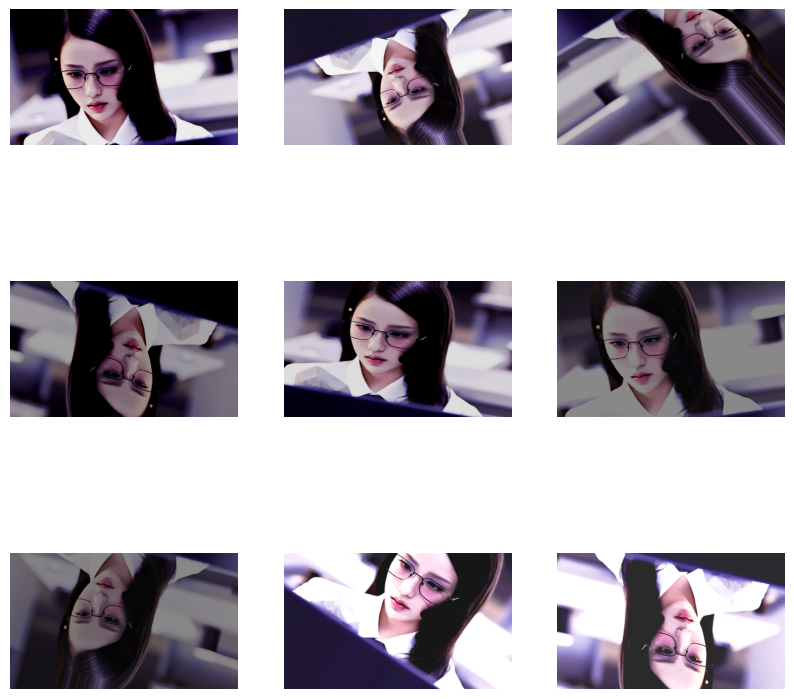

In [12]:
image_path = '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0327_cnn/jisoo.png'
visualize_augmented_images(image_path)

### 메모리 이미지를 증강한 다음 실제 파일로 저장하는 방법
  - 시간 오래 걸림.
  - 메모리에 있는 60,000장 데이터를 파일로 만드는 과정

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
datagen = ImageDataGenerator(width_shift_range = 0.2, height_shift_range = 0.2)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9,
                                     save_to_dir = 'images', save_prefix = 'aug', save_format = 'png'):
  i = i + 1

### 시간이 너무 걸려서, 간단하게 구현
  - image data generator 학습

In [13]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 정규화 부분이 없음. 밑의 코드에 rescale 부분이 그걸 해줌.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
import numpy as np
np.random.seed(3)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# 사이즈 조절, 이미지 정규화 기능
# EfficientNet, B0 224x224 이미지 사이즈
train_datagen = ImageDataGenerator(rescale = 1./255)

# flow_from_directory (파일에서 로딩)
train_generator = train_datagen.flow(  # 메모리에 있는 데이터를 전달할 때 씀.
    X_train, y_train, batch_size = 128,
)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow(
    X_test, y_test, batch_size = 128,
)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.fit(
    train_generator,
    steps_per_epoch = 15,  # epoch당 몇 번 generate할 것인가.
    epochs = 30,
    validation_data = test_generator,
    validation_steps = 5  # 한 번의 에포크(epoch) 동안 검증 데이터를 몇 번 반복해서 사용할지 지정
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 409ms/step - accuracy: 0.5148 - loss: 1.6759 - val_accuracy: 0.8203 - val_loss: 0.5972
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 698ms/step - accuracy: 0.8434 - loss: 0.5369 - val_accuracy: 0.8938 - val_loss: 0.4086
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.9009 - loss: 0.3688 - val_accuracy: 0.9297 - val_loss: 0.2617
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 714ms/step - accuracy: 0.9250 - loss: 0.2810 - val_accuracy: 0.9422 - val_loss: 0.2144
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 743ms/step - accuracy: 0.9442 - loss: 0.1822 - val_accuracy: 0.9438 - val_loss: 0.1660
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 664ms/step - accuracy: 0.9484 - loss: 0.1628 - val_accuracy: 0.9609 - val_loss: 0.1275
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 713ms/step - accuracy: 0.9393 - loss: 0.2062 - val_accuracy: 0.9578 - val_loss: 0.1328
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.9596 - loss: 0.1497 - val_accuracy: 0.9563 -

In [19]:
evaluation = model.evaluate(test_generator)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9786 - loss: 0.0615
Loss: 0.06156878545880318
Accuracy: 0.9789999723434448


###dogs_vs_cats.zip

In [20]:
from zipfile import ZipFile
import numpy as np

In [21]:
with ZipFile('/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats.zip', 'r') as zip:
  zip.extractall()
  print('done')

done


In [31]:
with ZipFile('/content/dogsvscats/train', 'r') as zip:
  zip.extractall()
  print('done')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogsvscats/train'

In [25]:
from zipfile import ZipFile

# dogs_vs_cats.zip 파일 해제
with ZipFile('/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats.zip', 'r') as zip:
    zip.extractall('/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats')  # 추출 경로 설정
    print('dogs_vs_cats.zip Extraction done!')


dogs_vs_cats.zip Extraction done!


In [26]:
zip_files = [
    '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/test.zip',
    '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/train.zip'
]

for zip_file_path in zip_files:
    with ZipFile(zip_file_path, 'r') as zip:
        zip.extractall(f'/content/extracted/{zip_file_path.split("/")[-1].replace(".zip", "")}')  # 개별 폴더에 추출
        print(f'{zip_file_path} Extraction done!')


/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/test.zip Extraction done!
/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/train.zip Extraction done!


In [ ]:
# with ZipFile('', 'r') as zip:
#   zip.extractall()
#   print('done')

# 이미지 확인

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2
import random
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [33]:
!unzip -l "/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/train.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
     4826  2013-09-20 10:02   train/dog.550.jpg
    44699  2013-09-20 10:02   train/dog.5500.jpg
    30379  2013-09-20 10:02   train/dog.5501.jpg
    25140  2013-09-20 10:02   train/dog.5502.jpg
    21938  2013-09-20 10:02   train/dog.5503.jpg
     7717  2013-09-20 10:02   train/dog.5504.jpg
    26625  2013-09-20 10:02   train/dog.5505.jpg
     8554  2013-09-20 10:02   train/dog.5506.jpg
    19899  2013-09-20 10:02   train/dog.5507.jpg
     9154  2013-09-20 10:02   train/dog.5508.jpg
    25600  2013-09-20 10:02   train/dog.5509.jpg
    27390  2013-09-20 10:02   train/dog.551.jpg
    13884  2013-09-20 10:02   train/dog.5510.jpg
    13470  2013-09-20 10:02   train/dog.5511.jpg
    16116  2013-09-20 10:02   train/dog.5512.jpg
    51805  2013-09-20 10:02   train/dog.5513.jpg
    10687  2013-09-20 10:02   train/dog.5514.jpg
    47883  2013-09-20 10:02   train/dog.5515.jpg
    35515  2013-09-20 10:02   train/dog.5516.jpg
    48009  2013-09-20 10:02   train

In [35]:
# import os

# PATH = '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/train.zip'
# filename = os.listdir(PATH)

# IMG_SIZE = 100
# plt.figure(figsize = (10, 10))

# for i in range(1, 7):
#   img_array = cv2.imread(os.path.join(PATH, filename[i]))
#   resize_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#   plt.subplot(3, 3, i)

#   img = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB)
#   plt.axis('off')
#   plt.imshow(image)

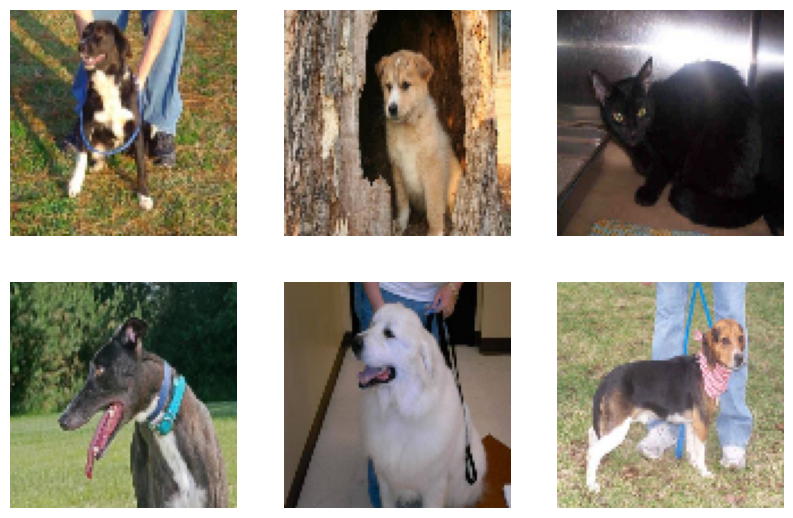

In [34]:
import os
import cv2
import zipfile
import matplotlib.pyplot as plt

zip_path = '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/train.zip'
extract_path = '/content/train_data'
image_folder = os.path.join(extract_path, 'train')  # 실제 이미지 폴더

# 압축 해제 (이미 풀었으면 이 줄은 생략 가능)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 이미지 파일 리스트 뽑기
all_files = os.listdir(image_folder)
image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# 이미지 시각화
IMG_SIZE = 100
plt.figure(figsize=(10, 10))

count = 0
i = 0

while count < 6 and i < len(image_files):
    img_path = os.path.join(image_folder, image_files[i])
    img_array = cv2.imread(img_path)

    if img_array is None:
        print(f"이미지 로드 실패: {img_path}")
        i += 1
        continue

    resize_image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, count + 1)
    plt.axis('off')
    plt.imshow(img)

    count += 1
    i += 1

plt.show()


In [ ]:
# training_data = []
# x_train = []
# y_train = []

# for files in tqdm(os.listdir(PATH)):
#   try:
#     if files.find('cat') == -1:
#       category = 0  # dog
#     else:
#       category = 1  # cat

#     img_array = cv2.imread(os.path.join(PATH, files), cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array, (IMG_SIZE ))
#     training_data.append([new_array, category])

#     x_train.append([new_array])
#     y_train.append([category])

#   except Exception as e:
#     pass

In [36]:
IMG_SIZE = 100
training_data = []
x_train = []
y_train = []

PATH = '/content/train_data/train'  # 실제 이미지 폴더
for file in tqdm(os.listdir(PATH)):
    try:
        if 'cat' in file:
            category = 1  # cat
        else:
            category = 0  # dog

        img_path = os.path.join(PATH, file)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"이미지 로드 실패: {img_path}")
            continue

        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, category])

        x_train.append(new_array)
        y_train.append(category)

    except Exception as e:
        print(f"예외 발생: {file} / {str(e)}")
        continue

100%|██████████| 25000/25000 [00:21<00:00, 1148.34it/s]


### ndarray와 차수 변환

In [37]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [38]:
# 차수 변환
x_train.shape

(25000, 100, 100)

In [39]:
# 장 수, 가로, 세로, 채널
x_train = x_train.reshape(25000, 100, 100, 1)

In [42]:
!unzip -l "/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/test.zip"


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
    11253  2013-09-20 10:12   test/550.jpg
    19488  2013-09-20 10:15   test/5500.jpg
    14965  2013-09-20 10:15   test/5501.jpg
    14406  2013-09-20 10:15   test/5502.jpg
    14957  2013-09-20 10:15   test/5503.jpg
    15065  2013-09-20 10:15   test/5504.jpg
     2985  2013-09-20 10:15   test/5505.jpg
     4349  2013-09-20 10:15   test/5506.jpg
    27502  2013-09-20 10:15   test/5507.jpg
    54253  2013-09-20 10:15   test/5508.jpg
     2312  2013-09-20 10:15   test/5509.jpg
    28547  2013-09-20 10:12   test/551.jpg
     7044  2013-09-20 10:15   test/5510.jpg
    18542  2013-09-20 10:15   test/5511.jpg
     3973  2013-09-20 10:15   test/5512.jpg
    34616  2013-09-20 10:15   test/5513.jpg
    23885  2013-09-20 10:15   test/5514.jpg
    22044  2013-09-20 10:15   test/5515.jpg
    23076  2013-09-20 10:15   test/5516.jpg
    27323  2013-09-20 10:15   test/5517.jpg
    21609  2013-09-20 10:15   test/5518.jpg
     3684  2013-09-20 10:15   test/5519.jp

In [43]:
import zipfile

test_zip_path = '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/dogs_vs_cats/test.zip'
extract_test_path = '/content/train_data'  # test 폴더가 여기 밑에 생기게 됨

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_test_path)


In [44]:
testing_data = []
PATH = '/content/train_data/test'
for files in tqdm(os.listdir(PATH)):
  try:
    img_array = cv2.imread(os.path.join(PATH, files), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    testing_data.append([new_array])

  except Exception as e:
    pass

100%|██████████| 12500/12500 [00:09<00:00, 1265.23it/s]


# Train, Test 분리

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state=51)
X_train.shape

(17500, 100, 100, 1)

In [46]:
from tensorflow.keras.utils import to_categorical

X_train = X_train/255.0
X_test = X_test/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
from tensorflow.keras.optimizers import SGD

In [49]:
model = Sequential()

# padding = valid
model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu', input_shape = (100, 100, 1)))  # 96x96x32
model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu'))  # 92x92x64

model.add(MaxPooling2D(pool_size=(4, 4)))  # 23x23x64

## top 부분
model.add(Flatten()) # 33856
model.add(Dense(512, activation='relu'))  # 33856 x 512
model.add(Dense(2, activation='softmax'))  # 512 x 2

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 96, 96, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 92, 92, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      17,334,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,387,906 (66.33 MB)

 Trainable params: 17,387,906 (66.33 MB)

 Non-trainable params: 0 (0.00 B)

# 학습

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = '/content/drive/MyDrive/미래융합교육원/3월/딥러닝/0328_transer-learning/dogs_vs_cats/model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "{epoch:02d}-{val_loss:.4f}.keras"
modelpos = os.path.join(MODEL_DIR, modelpath)

checkpointer = ModelCheckpoint(filepath=modelpos, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [54]:
# # 오래 걸림.

# batch_size = 32
# epochs = 3
# history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,
#                     verbose = 1, validation_data = (X_test, y_test),
#                     callbacks = [early_stopping_callback, checkpointer])

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# 전이학습

In [53]:
from tensorflow import keras

# GoogleNet -> Inceptionv4 -> Xception, MobileNet
# depthwise convolution(채널 별로 컨볼루션) + pointwise convolution(채널별 결과 통합)
base_model = keras.applications.Xception(  # extra ception
    weights = 'imagenet',  # imagenet으로 학습한 가중치 사용
    input_shape = (100, 100, 3),  # 내부의 첫 레이어가 resize이기 때문.
    include_top = False,  # CNN 모델, 두 부분으로 분할 (CNN, FFNN)  # FFNN이 top임. 그 부분을 쓰지 않겠다.
)

base_model.trainable = False  # 학습된 가중치는 학습하지 않겠다.
inputs = keras.Input(shape = (100, 100, 1))  # input이 1 .
x = keras.layers.Concatenate()([inputs, inputs, inputs])  # Concatenate로 채널 3개 만듦.

# -1 ~ 1 사이 값
scale_layer = keras.layers.Rescaling(scale = 1/127.5, offset = -1)
x = scale_layer(x)
x = base_model(x, training = False)  # 결과값 -> flatten 하기 전까지의 값
# (None, 3, 3, 2048)
## top 부분 정의 # flatten을 사용하지 않고, GlobalAveragePooling2D를 사용한다.
x = keras.layers.GlobalAveragePooling2D()(x)  # 2048 vector
x = keras.layers.Dropout(0.2)(x)  # Dropout: 과적합 방지
outputs = keras.layers.Dense(2, activation = 'softmax')(x) # 2048x2
model = keras.Model(inputs, outputs)  # functional방식의 model 생성
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 100, 100, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100, 100, 3)    │              0 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 100, 100, 3)    │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ xception (Functional)     │ (None, 3, 3, 2048)     │     20,861,480 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 2048)           │              0 │ xception[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 2)              │          4,098 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,865,578 (79.60 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [63]:
# model.compile(optimizer = keras.optimizers.Adam(),
#               loss = keras.losses.BinaryCrossentropy(from_logits = True),
#               metrics = [keras.metrics.BinaryAccuracy()],)
# epochs = 10
# history = model.fit(X_train, y_train, epochs=epochs, validation_data = (X_test, y_test))